<a href="https://colab.research.google.com/github/ktiw007/DataScienceCompetitions/blob/Amazon-Hackerearth-ML-Challenge/Amazon_ML_Challenge_Final_Submission_(By_Kshitij_Tiwari).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is the Jupyter notebook for the Amazon ML Engineer Hiring Challenge. Given below is the methodology followed for the whole process-
- Load the dataset
Perform EDA
- Perform data cleaning and impute missing values
- Use different algorithms such as- Logistic Regression, Decision Tree, Random Forest, XGBoost, Support Vector Machine (Classifier)
- Perform Hyper parameter tuning for all relevant models
- Select the best model and deploy


#Adding all the relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import plotly.io as pio
pio.renderers.default = 'colab'
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import *
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline

###Reading the training and the testing dataset

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/Amazon ML Challenge/train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/Amazon ML Challenge/test.csv')

In [ ]:
train_df.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [ ]:
test_df.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [ ]:
print(train_df.shape,test_df.shape)

(10738, 12) (7160, 11)


#Exploratory Data Analysis (EDA)

###Printing the count of missing values in each column

In [ ]:
print('For Training Datatset','\n')
print(train_df.isnull().sum(),'\n')
print('For Testing Datatset','\n')
print(test_df.isnull().sum())

For Training Datatset 

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64 

For Testing Datatset 

customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64


###Printing the count of each category in the customer_category column

In [ ]:
print(train_df.customer_category.value_counts())

0    9443
1    1295
Name: customer_category, dtype: int64


###Dropping customer_id column from both training and testing data set (testing data id saved for further use)

In [ ]:
train_df.drop(columns=['customer_id'],inplace=True)
test_df_customer_id=test_df['customer_id']
test_df.drop(columns=['customer_id'],inplace=True)

In categorical type columns- 'customer_active_segment' and 'X1', replacing null values as a new category as it will help in calculating missing values for other columns

In [ ]:
train_df['X1']=train_df['X1'].fillna('None')
train_df['customer_active_segment']=train_df['customer_active_segment'].fillna('None')
test_df['customer_active_segment']=test_df['customer_active_segment'].fillna('None')
test_df['X1']=test_df['X1'].fillna('None')

###Statistical summary of training anf testing datatset

In [ ]:
train_df.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,10738.000000,10696.000000,10738.000000,10701.000000,10738.000000,10692.000000,10672.000000,10738.000000,10738.000000
mean,19.060941,5.274847,0.175912,0.374230,2.376895,5.788180,3.150071,17.061836,0.120600
std,7.419609,1.882559,0.372829,1.222031,5.601911,2.531309,1.035416,18.762693,0.325677
min,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.363338,-0.486834,0.000000
25%,13.518021,3.971587,0.010840,-0.027666,0.313610,4.193234,2.454017,4.530085,0.000000
50%,18.774109,5.218479,0.074078,0.037201,0.516830,4.842575,3.118394,12.653357,0.000000
75%,24.501719,6.520364,0.159606,0.179029,1.125380,6.286400,3.756566,23.114577,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,18.743836,9.090206,248.552755,1.000000


In [ ]:
test_df.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
count,7160.000000,7131.000000,7160.000000,7144.000000,7160.000000,7117.000000,7119.000000,7160.000000
mean,19.700385,5.385970,0.111038,0.202822,1.885588,5.444226,3.309440,19.889035
std,6.980932,1.779850,0.260733,0.886824,4.967213,2.336244,1.060144,20.783679
min,1.248385,-0.113791,-0.615134,-0.381836,0.022957,2.718819,0.620935,-0.501215
25%,14.250243,4.146965,0.005032,-0.033382,0.282119,4.099106,2.645399,6.910150
50%,19.256051,5.358104,0.063178,0.024508,0.457636,4.669433,3.254096,14.630477
75%,24.756843,6.579949,0.135072,0.130086,0.822750,5.665742,3.875797,26.102862
max,42.960500,13.678108,2.528584,13.533233,49.683739,19.095799,11.388305,257.251810


###Correlation Heatmap

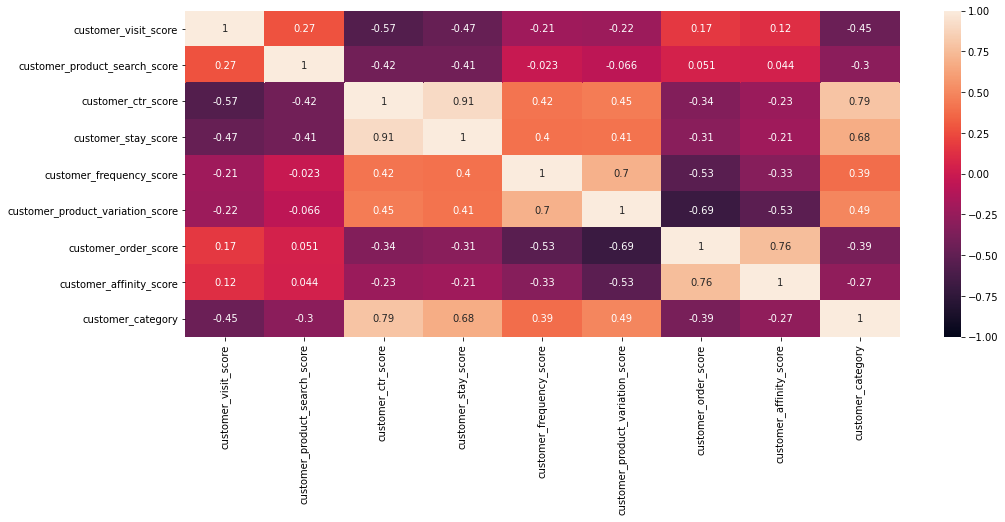

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)

###Histogram plot for each of the columns having missing values

In [ ]:
train_df['customer_product_search_score'].iplot(kind='hist',bins=50,color='blue',title="customer_product_search_score")
train_df['customer_stay_score'].iplot(kind='hist',bins=50,color='red',title="customer_stay_score")
train_df['customer_product_variation_score'].iplot(kind='hist',bins=50,color='orange',title="customer_product_variation_score")
train_df['customer_order_score'].iplot(kind='hist',bins=50,color='yellow',title="customer_order_score")
train_df['customer_active_segment'].iplot(kind='hist',color='violet',title="customer_active_segment")
train_df['X1'].iplot(kind='hist',color='green',title="X1")

###Boxplot of each of the continuous type features as y axis and categorical columns as x axis

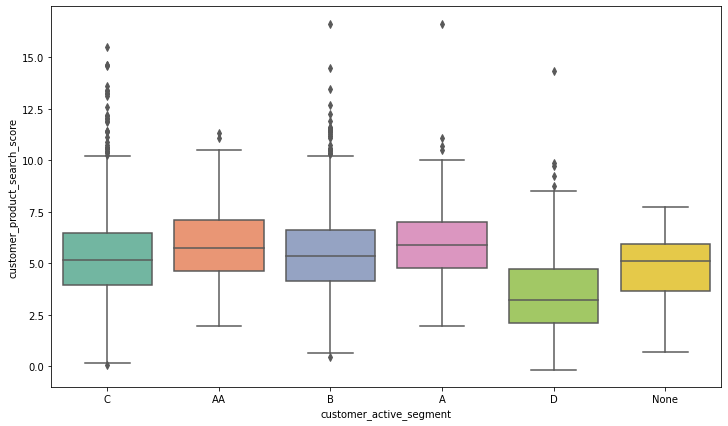

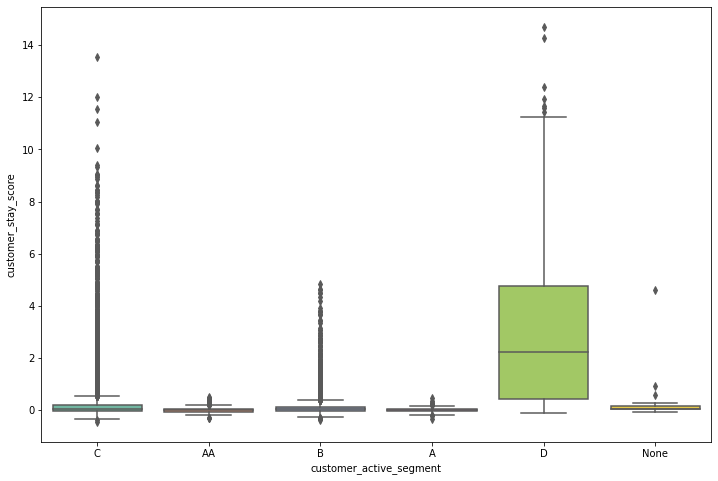

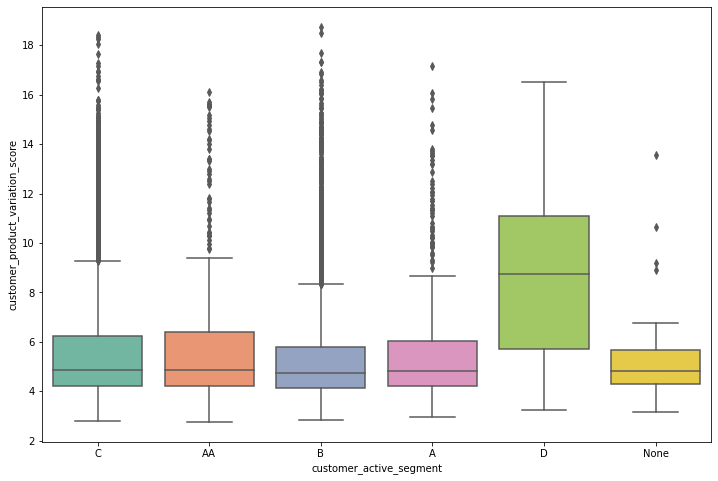

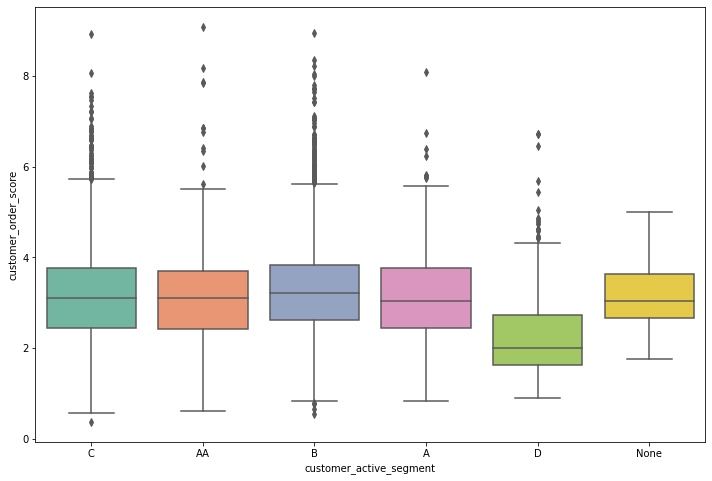

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='customer_active_segment',y='customer_product_search_score',data=train_df,palette='Set2' )
plt.figure(figsize=(12, 8))
sns.boxplot(x='customer_active_segment',y='customer_stay_score',data=train_df,palette='Set2' )
plt.figure(figsize=(12, 8))
sns.boxplot(x='customer_active_segment',y='customer_product_variation_score',data=train_df,palette='Set2' )
plt.figure(figsize=(12, 8))
sns.boxplot(x='customer_active_segment',y='customer_order_score',data=train_df,palette='Set2' )

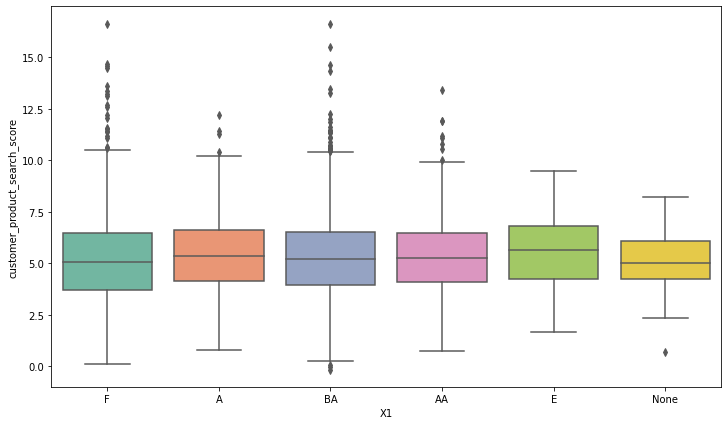

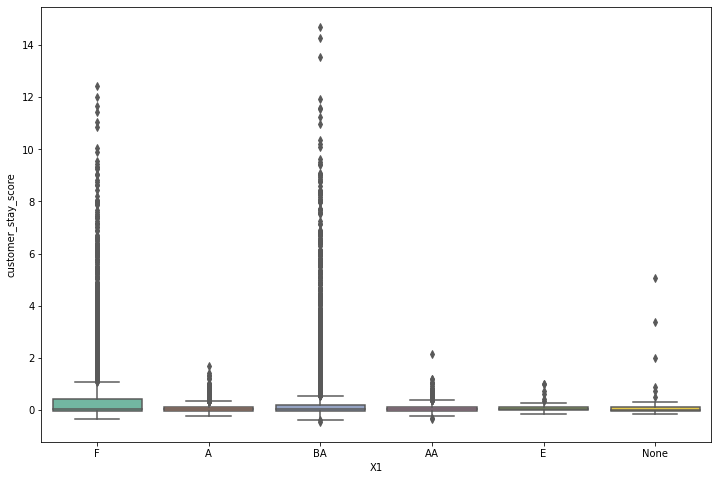

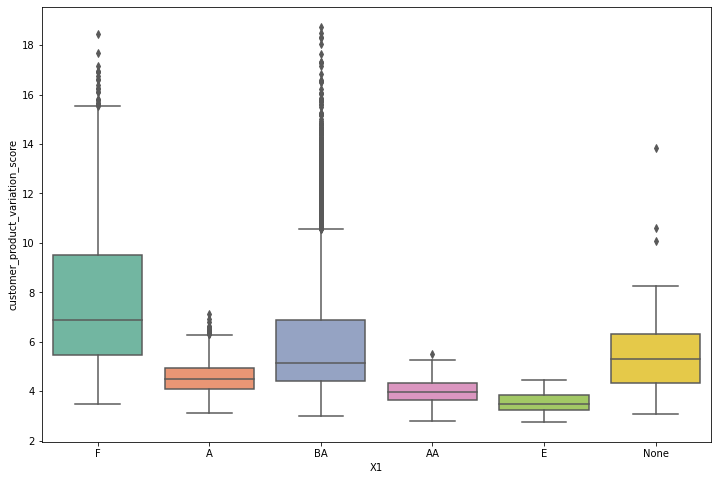

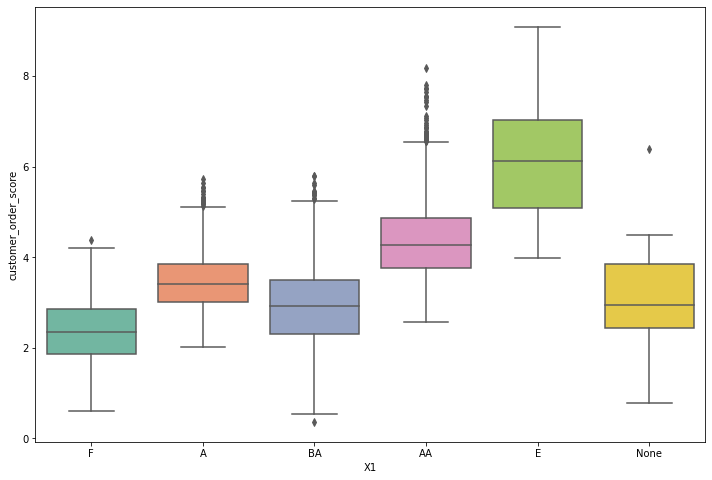

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='X1',y='customer_product_search_score',data=train_df,palette='Set2' )
plt.figure(figsize=(12, 8))
sns.boxplot(x='X1',y='customer_stay_score',data=train_df,palette='Set2' )
plt.figure(figsize=(12, 8))
sns.boxplot(x='X1',y='customer_product_variation_score',data=train_df,palette='Set2' )
plt.figure(figsize=(12, 8))
sns.boxplot(x='X1',y='customer_order_score',data=train_df,palette='Set2' )

###Individual Boxplot of each of the continuous type columns

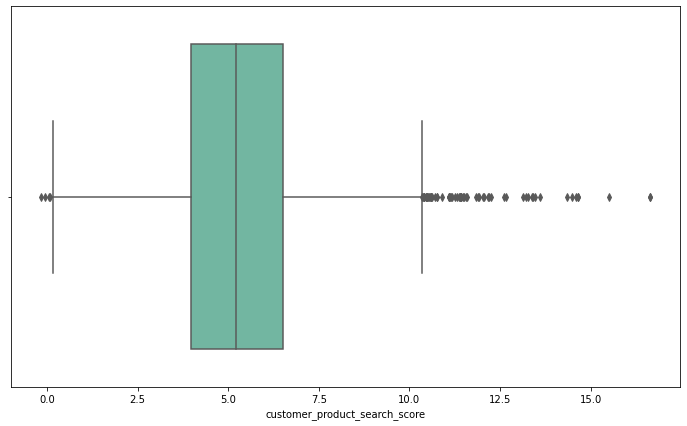

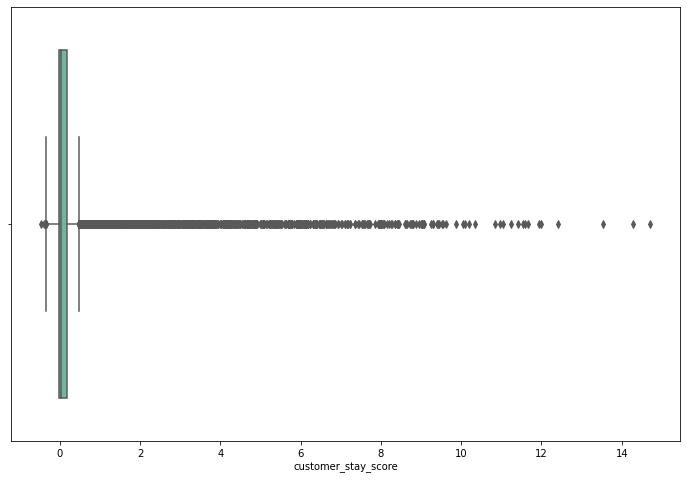

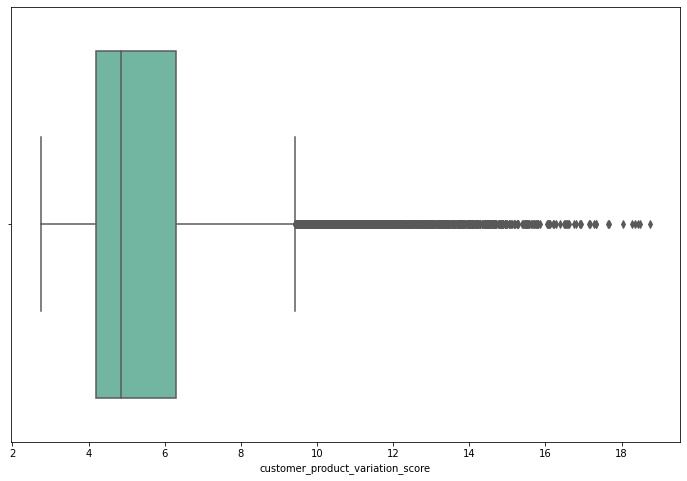

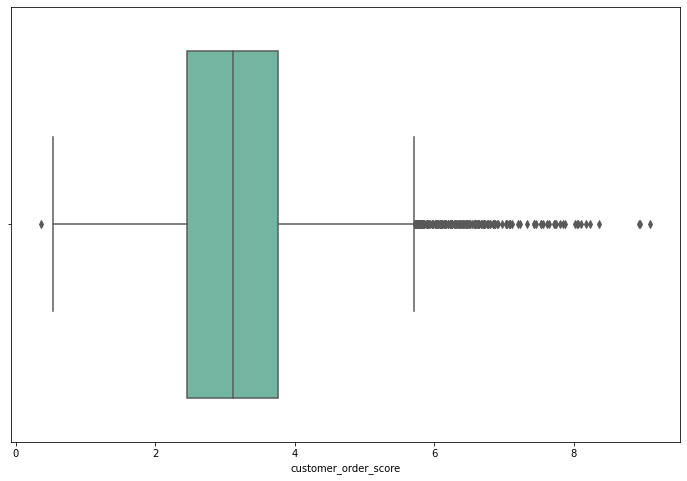

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='customer_product_search_score',data=train_df,palette='Set2' )
plt.figure(figsize=(12, 8))
sns.boxplot(x='customer_stay_score',data=train_df,palette='Set2' )
plt.figure(figsize=(12, 8))
sns.boxplot(x='customer_product_variation_score',data=train_df,palette='Set2' )
plt.figure(figsize=(12, 8))
sns.boxplot(x='customer_order_score',data=train_df,palette='Set2')

###Mean and median calculation for each of the continuous type variable by grouping it with repect to categorical columns

In [ ]:
print(train_df.groupby('customer_active_segment', as_index=False)['customer_product_search_score'].mean())
print(train_df.groupby('customer_active_segment', as_index=False)['customer_stay_score'].mean())
print(train_df.groupby('customer_active_segment', as_index=False)['customer_product_variation_score'].mean())
print(train_df.groupby('customer_active_segment', as_index=False)['customer_order_score'].mean())

  customer_active_segment  customer_product_search_score
0                       A                       5.942138
1                      AA                       5.862021
2                       B                       5.411242
3                       C                       5.235715
4                       D                       3.567598
5                    None                       4.795161
  customer_active_segment  customer_stay_score
0                       A            -0.002345
1                      AA             0.003975
2                       B             0.126680
3                       C             0.374801
4                       D             3.000292
5                    None             0.319202
  customer_active_segment  customer_product_variation_score
0                       A                          5.752596
1                      AA                          5.904676
2                       B                          5.461040
3                       C       

In [ ]:
print(train_df.groupby('X1', as_index=False)['customer_product_search_score'].mean())
print(train_df.groupby('X1', as_index=False)['customer_stay_score'].mean())
print(train_df.groupby('X1', as_index=False)['customer_product_variation_score'].mean())
print(train_df.groupby('X1', as_index=False)['customer_order_score'].mean())

     X1  customer_product_search_score
0     A                       5.389101
1    AA                       5.316400
2    BA                       5.269933
3     E                       5.573041
4     F                       5.132339
5  None                       5.089563
     X1  customer_stay_score
0     A             0.078965
1    AA             0.082887
2    BA             0.439104
3     E             0.085902
4     F             0.762677
5  None             0.340127
     X1  customer_product_variation_score
0     A                          4.538010
1    AA                          3.992518
2    BA                          6.133871
3     E                          3.550118
4     F                          7.731430
5  None                          5.773951
     X1  customer_order_score
0     A              3.453303
1    AA              4.384832
2    BA              2.897449
3     E              6.162232
4     F              2.362257
5  None              3.103313


In [ ]:
print(train_df.groupby('customer_active_segment', as_index=False)['customer_product_search_score'].median())
print(train_df.groupby('customer_active_segment', as_index=False)['customer_stay_score'].median())
print(train_df.groupby('customer_active_segment', as_index=False)['customer_product_variation_score'].median())
print(train_df.groupby('customer_active_segment', as_index=False)['customer_order_score'].median())

  customer_active_segment  customer_product_search_score
0                       A                       5.889633
1                      AA                       5.738121
2                       B                       5.334709
3                       C                       5.173062
4                       D                       3.206841
5                    None                       5.125916
  customer_active_segment  customer_stay_score
0                       A            -0.012309
1                      AA            -0.013973
2                       B             0.029184
3                       C             0.041612
4                       D             2.223771
5                    None             0.048817
  customer_active_segment  customer_product_variation_score
0                       A                          4.838693
1                      AA                          4.845180
2                       B                          4.728768
3                       C       

In [ ]:
print(train_df.groupby('X1', as_index=False)['customer_product_search_score'].median())
print(train_df.groupby('X1', as_index=False)['customer_stay_score'].median())
print(train_df.groupby('X1', as_index=False)['customer_product_variation_score'].median())
print(train_df.groupby('X1', as_index=False)['customer_order_score'].median())

     X1  customer_product_search_score
0     A                       5.334520
1    AA                       5.235749
2    BA                       5.228237
3     E                       5.625179
4     F                       5.049850
5  None                       5.024130
     X1  customer_stay_score
0     A             0.028552
1    AA             0.036529
2    BA             0.037461
3     E             0.036424
4     F             0.051476
5  None             0.009067
     X1  customer_product_variation_score
0     A                          4.489124
1    AA                          3.968743
2    BA                          5.138562
3     E                          3.491190
4     F                          6.870972
5  None                          5.288381
     X1  customer_order_score
0     A              3.410040
1    AA              4.276306
2    BA              2.935542
3     E              6.124803
4     F              2.355580
5  None              2.951344


###Function for missing value imputation

In [ ]:
def impute_missing_value(cols,mean_A,mean_AA,mean_B,mean_C,mean_D,mean_None):
    missingValCol = cols[0]
    customer_active_segment = cols[1]
    if pd.isnull(missingValCol):
        if customer_active_segment == 'A':
            return mean_A
        elif customer_active_segment == 'AA':
            return mean_AA
        elif customer_active_segment == 'B':
            return mean_B
        elif customer_active_segment == 'C':
            return mean_C
        elif customer_active_segment == 'D':
            return mean_D
        elif customer_active_segment == 'None':
            return mean_None
    else:
        return missingValCol

###First groupwise mean and median values has been checked for each of the continuous type features having missing values. Then the imputation has been done by using groupwise mean for the feature 'customer_active segment' as it had the least variation

In [ ]:
mean_A=train_df[train_df['customer_active_segment']=='A'].customer_product_search_score.mean()
mean_AA=train_df[train_df['customer_active_segment']=='AA'].customer_product_search_score.mean()
mean_B=train_df[train_df['customer_active_segment']=='B'].customer_product_search_score.mean()
mean_C=train_df[train_df['customer_active_segment']=='C'].customer_product_search_score.mean()
mean_D=train_df[train_df['customer_active_segment']=='D'].customer_product_search_score.mean()
mean_None=train_df[train_df['customer_active_segment']=='None'].customer_product_search_score.mean()

train_df['customer_product_search_score'] = train_df[['customer_product_search_score','customer_active_segment']].apply(impute_missing_value,args=[mean_A,mean_AA,mean_B,mean_C,mean_D,mean_None],axis=1)
test_df['customer_product_search_score'] = test_df[['customer_product_search_score','customer_active_segment']].apply(impute_missing_value,args=[mean_A,mean_AA,mean_B,mean_C,mean_D,mean_None],axis=1)

In [ ]:
mean_A=train_df[train_df['customer_active_segment']=='A'].customer_stay_score.mean()
mean_AA=train_df[train_df['customer_active_segment']=='AA'].customer_stay_score.mean()
mean_B=train_df[train_df['customer_active_segment']=='B'].customer_stay_score.mean()
mean_C=train_df[train_df['customer_active_segment']=='C'].customer_stay_score.mean()
mean_D=train_df[train_df['customer_active_segment']=='D'].customer_stay_score.mean()
mean_None=train_df[train_df['customer_active_segment']=='None'].customer_stay_score.mean()

train_df['customer_stay_score'] = train_df[['customer_stay_score','customer_active_segment']].apply(impute_missing_value,args=[mean_A,mean_AA,mean_B,mean_C,mean_D,mean_None],axis=1)
test_df['customer_stay_score'] = test_df[['customer_stay_score','customer_active_segment']].apply(impute_missing_value,args=[mean_A,mean_AA,mean_B,mean_C,mean_D,mean_None],axis=1)

In [ ]:
mean_A=train_df[train_df['customer_active_segment']=='A'].customer_product_variation_score.mean()
mean_AA=train_df[train_df['customer_active_segment']=='AA'].customer_product_variation_score.mean()
mean_B=train_df[train_df['customer_active_segment']=='B'].customer_product_variation_score.mean()
mean_C=train_df[train_df['customer_active_segment']=='C'].customer_product_variation_score.mean()
mean_D=train_df[train_df['customer_active_segment']=='D'].customer_product_variation_score.mean()
mean_None=train_df[train_df['customer_active_segment']=='None'].customer_product_variation_score.mean()

train_df['customer_product_variation_score'] = train_df[['customer_product_variation_score','customer_active_segment']].apply(impute_missing_value,args=[mean_A,mean_AA,mean_B,mean_C,mean_D,mean_None],axis=1)
test_df['customer_product_variation_score'] = test_df[['customer_product_variation_score','customer_active_segment']].apply(impute_missing_value,args=[mean_A,mean_AA,mean_B,mean_C,mean_D,mean_None],axis=1)

In [ ]:
mean_A=train_df[train_df['customer_active_segment']=='A'].customer_order_score.mean()
mean_AA=train_df[train_df['customer_active_segment']=='AA'].customer_order_score.mean()
mean_B=train_df[train_df['customer_active_segment']=='B'].customer_order_score.mean()
mean_C=train_df[train_df['customer_active_segment']=='C'].customer_order_score.mean()
mean_D=train_df[train_df['customer_active_segment']=='D'].customer_order_score.mean()
mean_None=train_df[train_df['customer_active_segment']=='None'].customer_order_score.mean()

train_df['customer_order_score'] = train_df[['customer_order_score','customer_active_segment']].apply(impute_missing_value,args=[mean_A,mean_AA,mean_B,mean_C,mean_D,mean_None],axis=1)
test_df['customer_order_score'] = test_df[['customer_order_score','customer_active_segment']].apply(impute_missing_value,args=[mean_A,mean_AA,mean_B,mean_C,mean_D,mean_None],axis=1)

In [ ]:
print('For Training Datatset','\n')
print(train_df.isnull().sum(),'\n')
print('For Testing Datatset','\n')
print(test_df.isnull().sum())

For Training Datatset 

customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
customer_category                   0
dtype: int64 

For Testing Datatset 

customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
dtype: int64


###Dealing with categorical features

In [ ]:
train_df=pd.get_dummies(train_df)
test_df=pd.get_dummies(test_df)

###Dropping the target feature

In [ ]:
X=train_df.drop('customer_category',1)
y=train_df['customer_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

###Model Building

#Logisitic Regression with default parameters

In [ ]:
model=LogisticRegression(C= 1, penalty= 'l2', solver= 'liblinear')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(metrics.precision_score(y_test , y_pred , average='macro'))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9737779467921599
[[2814    8]
 [  81  319]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2822
           1       0.98      0.80      0.88       400

    accuracy                           0.97      3222
   macro avg       0.97      0.90      0.93      3222
weighted avg       0.97      0.97      0.97      3222



#Decision Tree Classifier with default parameters

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(metrics.precision_score(y_test , y_pred , average='macro'))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.89931242615343
[[2752   70]
 [  72  328]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2822
           1       0.82      0.82      0.82       400

    accuracy                           0.96      3222
   macro avg       0.90      0.90      0.90      3222
weighted avg       0.96      0.96      0.96      3222



#Random Forest with default parameters

In [ ]:
model = RandomForestClassifier(bootstrap=False,criterion='entropy', max_depth= 50,max_features='sqrt',
                                min_samples_leaf=2,min_samples_split=4,n_estimators= 100)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(metrics.precision_score(y_test , y_pred , average='macro'))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9717973999702048
[[2809   13]
 [  57  343]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2822
           1       0.96      0.86      0.91       400

    accuracy                           0.98      3222
   macro avg       0.97      0.93      0.95      3222
weighted avg       0.98      0.98      0.98      3222



#XGBClassifier with default parameters

In [ ]:
model = XGBClassifier()#colsample_bylevel =0.5,colsample_bytree= 0.3,gamma= 2,
                      #learning_rate= 0.2,max_depth= 6,min_child_weight=3,subsample=0.3)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(metrics.precision_score(y_test , y_pred , average='macro'))
print("(tn, fp, fn, tp):",confusion_matrix(y_test,y_pred).ravel())
print(classification_report(y_test,y_pred))

0.9735946734714829
(tn, fp, fn, tp): [2810   12   55  345]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2822
           1       0.97      0.86      0.91       400

    accuracy                           0.98      3222
   macro avg       0.97      0.93      0.95      3222
weighted avg       0.98      0.98      0.98      3222



#Support Vector Machine Classifier with default parameters

In [ ]:
model = SVC()#C=0.1,decision_function_shape='ovo',degree= 2,gamma= 'scale',kernel= 'linear')
# {'C': 0.1,
#  'decision_function_shape': 'ovo',
#  'degree': 1,
#  'gamma': 'auto',
#  'kernel': 'poly'}
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(metrics.precision_score(y_test , y_pred , average='macro'))
print("(tn, fp, fn, tp):",confusion_matrix(y_test,y_pred).ravel())
print(classification_report(y_test,y_pred))

0.9634058312148888
(tn, fp, fn, tp): [2816    6  148  252]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2822
           1       0.98      0.63      0.77       400

    accuracy                           0.95      3222
   macro avg       0.96      0.81      0.87      3222
weighted avg       0.95      0.95      0.95      3222



#Logistic Regression Hyperparameter Tuning

In [ ]:
param_grid = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C': [100, 10, 1,0.1, 0.01]
}
  
model = GridSearchCV(LogisticRegression(), param_grid, cv=3,refit = True, verbose = 3, scoring='precision_macro', n_jobs=4) 
# fitting the model for grid search 
model.fit(X_train, y_train) 
y_pred=model.predict(X_test)
print(metrics.precision_score(y_test , y_pred , average='macro'))
print("(tn, fp, fn, tp):",confusion_matrix(y_test,y_pred).ravel())
print(classification_report(y_test,y_pred))

In [ ]:
model.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

#Hyperparameter Tuning for Random Forest Classifier

In [ ]:
param_grid = {
    'bootstrap': [False],
    'criterion': ['gini','entropy'],
    'max_depth': [30, 40, 50],
    'max_features': ['auto','sqrt','log2'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100, 200, 300]
}
  
model = GridSearchCV(RandomForestClassifier(), param_grid, cv=3,refit = True, verbose = 3, scoring='precision_macro', n_jobs=3) 
# fitting the model for grid search 
model.fit(X_train, y_train) 
y_pred=model.predict(X_test)
print(metrics.precision_score(y_test , y_pred , average='macro'))
print("(tn, fp, fn, tp):",confusion_matrix(y_test,y_pred).ravel())
print(classification_report(y_test,y_pred))

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   56.3s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  4.1min
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:  9.4min
[Parallel(n_jobs=3)]: Done 506 tasks      | elapsed: 17.2min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 30.1min
[Parallel(n_jobs=3)]: Done 972 out of 972 | elapsed: 38.1min finished


0.9706703910614525
(tn, fp, fn, tp): [2808   14   56  344]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2822
           1       0.96      0.86      0.91       400

    accuracy                           0.98      3222
   macro avg       0.97      0.93      0.95      3222
weighted avg       0.98      0.98      0.98      3222



In [ ]:
model.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

#Hyperparameter Tuning for XGB Classifier

In [ ]:
model = XGBClassifier(colsample_bylevel =0.5,colsample_bytree= 0.3,gamma= 2,
                      learning_rate= 0.2,max_depth= 6,min_child_weight=3,subsample=0.3)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(metrics.precision_score(y_test , y_pred , average='macro'))
print("(tn, fp, fn, tp):",confusion_matrix(y_test,y_pred).ravel())
print(classification_report(y_test,y_pred))

0.9688579387186629
(tn, fp, fn, tp): [2808   14   64  336]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2822
           1       0.96      0.84      0.90       400

    accuracy                           0.98      3222
   macro avg       0.97      0.92      0.94      3222
weighted avg       0.98      0.98      0.98      3222



In [ ]:
param_grid = {
        'max_depth': [5, 6, 7],
        'min_child_weight': [1,2,3],
        'gamma': [0,1,2,3],
        'learning_rate': [0.2,0.3,0.4],
        'subsample': [0.3,0.5,0.1],
        'colsample_bylevel': [0.3,0.5,1],
        'colsample_bytree': [0.3,0.5,1],
}
  
model = GridSearchCV(XGBClassifier(), param_grid, cv=3,refit = True, verbose = 2,scoring='precision_macro',n_jobs=5)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(metrics.precision_score(y_test , y_pred , average='macro'))
print("(tn, fp, fn, tp):",confusion_matrix(y_test,y_pred).ravel())
print(classification_report(y_test,y_pred))

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    8.0s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   25.9s
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:   56.1s
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed:  4.1min
[Parallel(n_jobs=5)]: Done 1975 tasks      | elapsed:  6.1min
[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed:  8.8min
[Parallel(n_jobs=5)]: Done 3271 tasks      | elapsed: 11.6min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 14.4min
[Parallel(n_jobs=5)]: Done 4891 tasks      | elapsed: 18.1min
[Parallel(n_jobs=5)]: Done 5822 tasks      | elapsed: 23.1min
[Parallel(n_jobs=5)]: Done 6835 tasks      | elapsed: 27.7min
[Parallel(n_jobs=5)]: Done 7928 tasks      | elapsed: 33.9min
[Parallel(n_jobs=5)]: Done 8748 out of 8748 | elapsed: 40.0mi

0.9688579387186629
(tn, fp, fn, tp): [2808   14   64  336]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2822
           1       0.96      0.84      0.90       400

    accuracy                           0.98      3222
   macro avg       0.97      0.92      0.94      3222
weighted avg       0.98      0.98      0.98      3222



In [ ]:
model.best_params_

{'colsample_bylevel': 0.5,
 'colsample_bytree': 0.3,
 'gamma': 2,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 3,
 'subsample': 0.3}

#Hyperparameter Tuning for SVC Classifier

In [ ]:
model = SVC(C= 0.1,decision_function_shape= 'ovo',degree=1,gamma= 'auto',kernel='poly')#)C=0.1,decision_function_shape='ovo',degree= 2,gamma= 'scale',kernel= 'linear')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(metrics.precision_score(y_test , y_pred , average='macro'))
print("(tn, fp, fn, tp):",confusion_matrix(y_test,y_pred).ravel())
print(classification_report(y_test,y_pred))

0.9659079104555134
(tn, fp, fn, tp): [2817    5  145  255]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2822
           1       0.98      0.64      0.77       400

    accuracy                           0.95      3222
   macro avg       0.97      0.82      0.87      3222
weighted avg       0.95      0.95      0.95      3222



In [ ]:
param_grid = {'C': [0.1,1,10],  
              'gamma': ['scale','auto'], 
              'kernel': ['poly'],
              'degree':[1,2,3],
              'decision_function_shape':['ovo','ovr']}  
  
model = GridSearchCV(SVC(), param_grid, cv=3,refit = True, verbose = 2,scoring='precision_macro')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(metrics.precision_score(y_test , y_pred , average='macro'))
print("(tn, fp, fn, tp):",confusion_matrix(y_test,y_pred).ravel())
print(classification_report(y_test,y_pred))

In [ ]:
model.best_params_

{'C': 0.1,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'auto',
 'kernel': 'poly'}

#Comparison of Precision score, recall score and F1 score before and after hyperparameter tuning

In [ ]:
Algorithms=['Logistic Regression','Decision Tree','Random Forest','XG Boost','SVC']
precision_before_tuning=[0.97, 0.90, 0.97, 0.97, 0.96]
recall_before_tuning=[0.8,0.82,0.85,0.86,0.63]
F1_before_tuning=[0.88, 0.83, 0.90,0.91, 0.77]

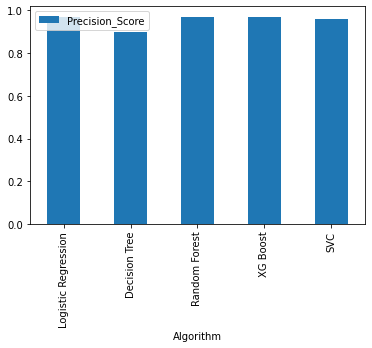

In [ ]:
precision_score_before_tuning=pd.DataFrame(columns=['Precision_Score','Algorithm'])
precision_score_before_tuning['Algorithm']=Algorithms
precision_score_before_tuning['Precision_Score']=precision_before_tuning
precision_score_before_tuning.plot(kind='bar',x='Algorithm')

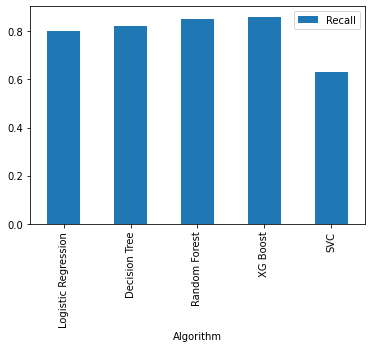

In [ ]:
recall_score_before_tuning=pd.DataFrame(columns=['Recall','Algorithm'])
recall_score_before_tuning['Algorithm']=Algorithms
recall_score_before_tuning['Recall']=recall_before_tuning
recall_score_before_tuning.plot(kind='bar',x='Algorithm')

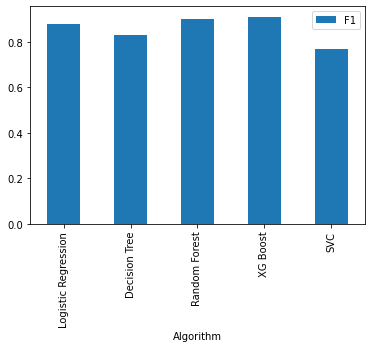

In [ ]:
F1_score_before_tuning=pd.DataFrame(columns=['F1','Algorithm'])
F1_score_before_tuning['Algorithm']=Algorithms
F1_score_before_tuning['F1']=F1_before_tuning
F1_score_before_tuning.plot(kind='bar',x='Algorithm')

In [ ]:
Algorithms=['Logistic Regression','Random Forest','XG Boost','SVC']
precision_after_tuning=[0.98, 0.96,0.96,0.97]
recall_after_tuning=[0.80,0.86,0.84,0.76]
F1_after_tuning=[0.88, 0.91,0.90,0.85]

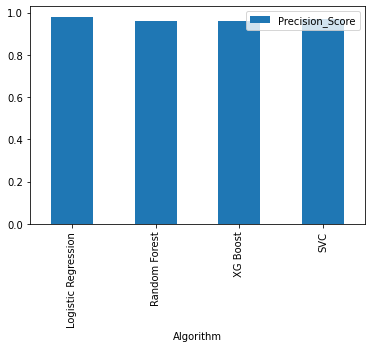

In [ ]:
precision_score_after_tuning=pd.DataFrame(columns=['Precision_Score','Algorithm'])
precision_score_after_tuning['Algorithm']=Algorithms
precision_score_after_tuning['Precision_Score']=precision_after_tuning
precision_score_after_tuning.plot(kind='bar',x='Algorithm')

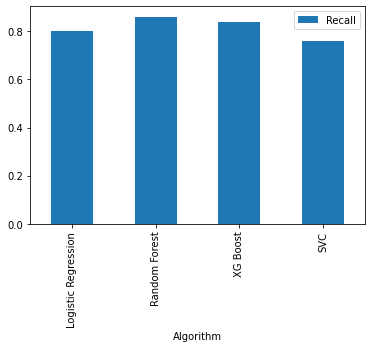

In [ ]:
recall_score_after_tuning=pd.DataFrame(columns=['Recall','Algorithm'])
recall_score_after_tuning['Algorithm']=Algorithms
recall_score_after_tuning['Recall']=recall_after_tuning
recall_score_after_tuning.plot(kind='bar',x='Algorithm')

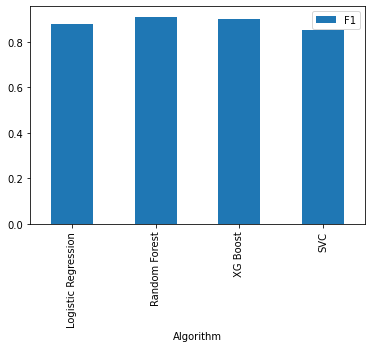

In [ ]:
F1_score_after_tuning=pd.DataFrame(columns=['F1','Algorithm'])
F1_score_after_tuning['Algorithm']=Algorithms
F1_score_after_tuning['F1']=F1_after_tuning
F1_score_after_tuning.plot(kind='bar',x='Algorithm')

#Results obtained from the hackathon portal for different algorithms

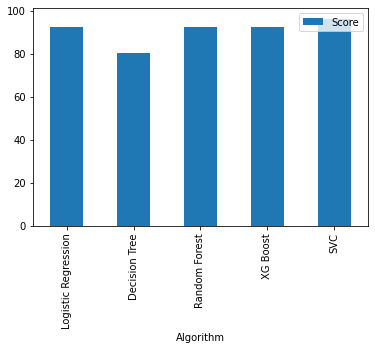

In [ ]:
Algorithms=['Logistic Regression','Decision Tree','Random Forest','XG Boost','SVC']
Score_From_Hackathon_Portal=[92.83,80.69,92.8,92.63,96.4]
df=pd.DataFrame(columns=['Score','Algorithm'])
df['Algorithm']=Algorithms
df['Score']=Score_From_Hackathon_Portal
df.plot(kind='bar',x='Algorithm')

###Code snippet for calculating the predicted values and storing the results

In [ ]:
finaldf=pd.DataFrame(columns=['customer_id','customer_category'])
finaldf['customer_id']=test_df_customer_id
print(finaldf.head())

  customer_id customer_category
0  csid_10739               NaN
1  csid_10740               NaN
2  csid_10741               NaN
3  csid_10742               NaN
4  csid_10743               NaN


In [ ]:
y_pred = model.predict(test_df)
finaldf['customer_category']=y_pred
print(finaldf.head(),finaldf.shape)

  customer_id  customer_category
0  csid_10739                  0
1  csid_10740                  0
2  csid_10741                  0
3  csid_10742                  0
4  csid_10743                  0 (7160, 2)


In [ ]:
finaldf.to_csv('Amazon_ML_Challenge_Prediction_43_Final_SVC.csv',index=False)